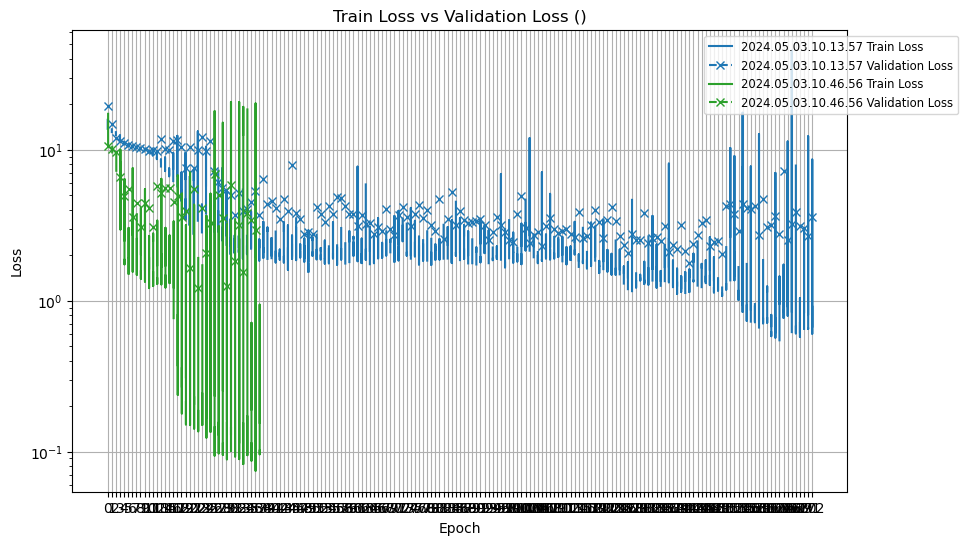

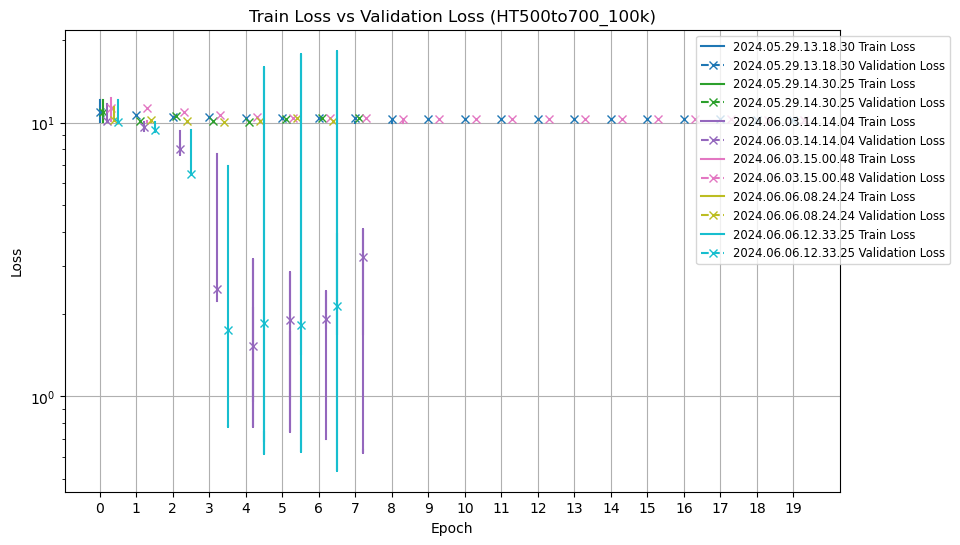

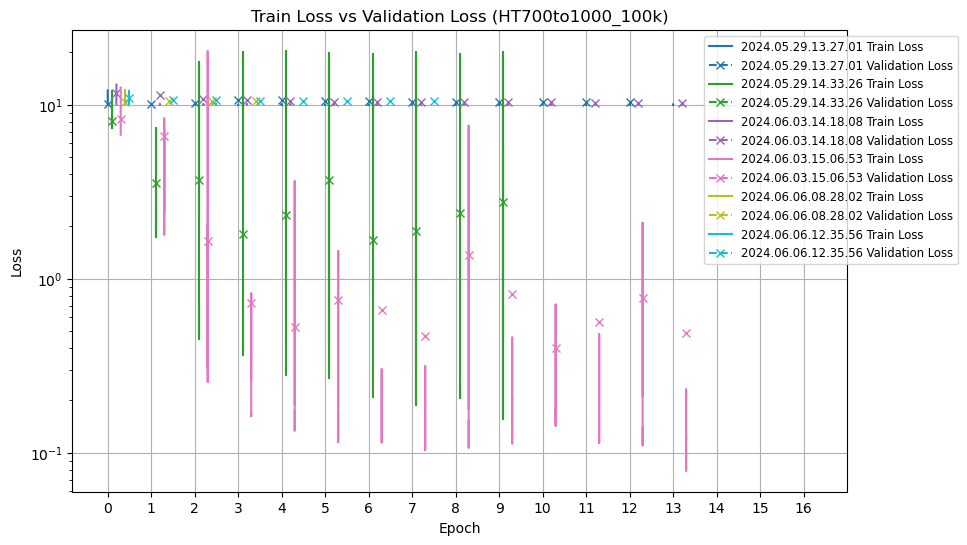

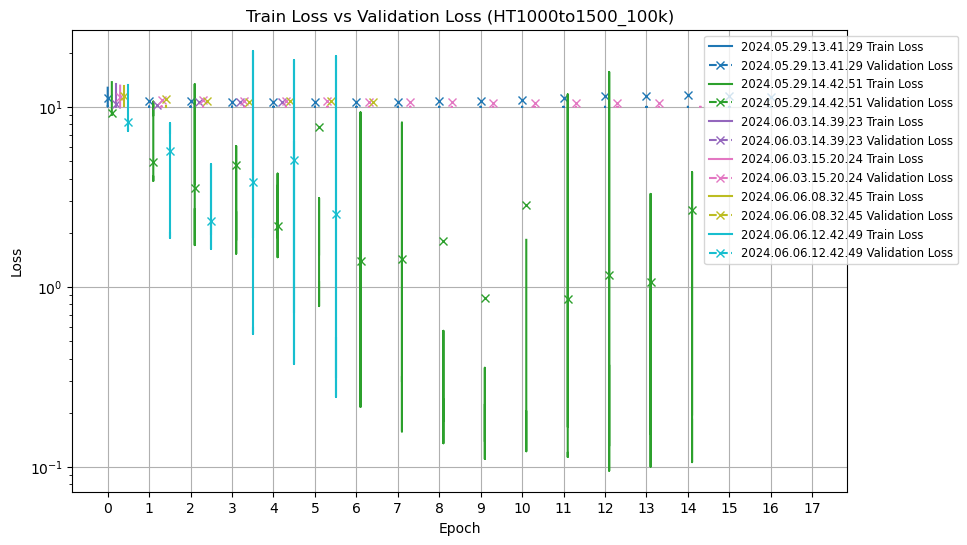

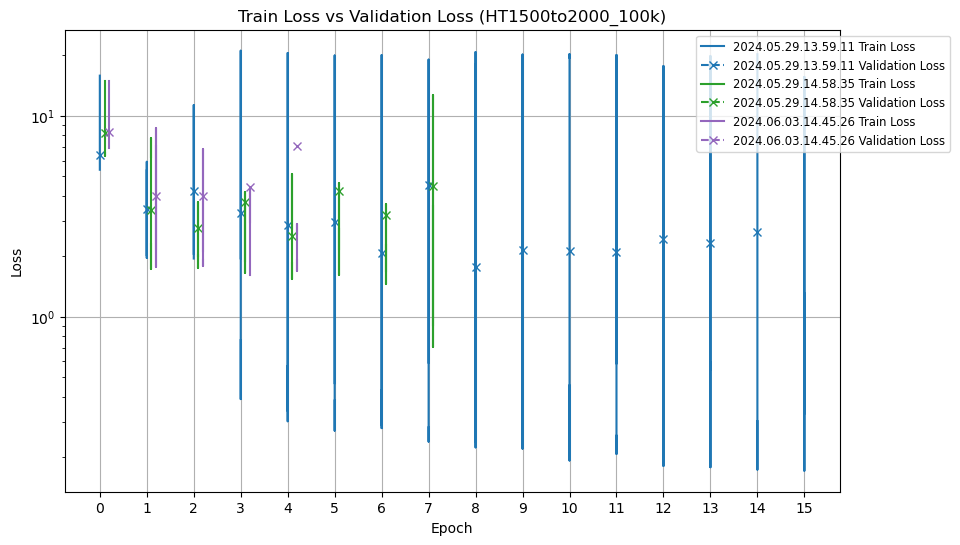

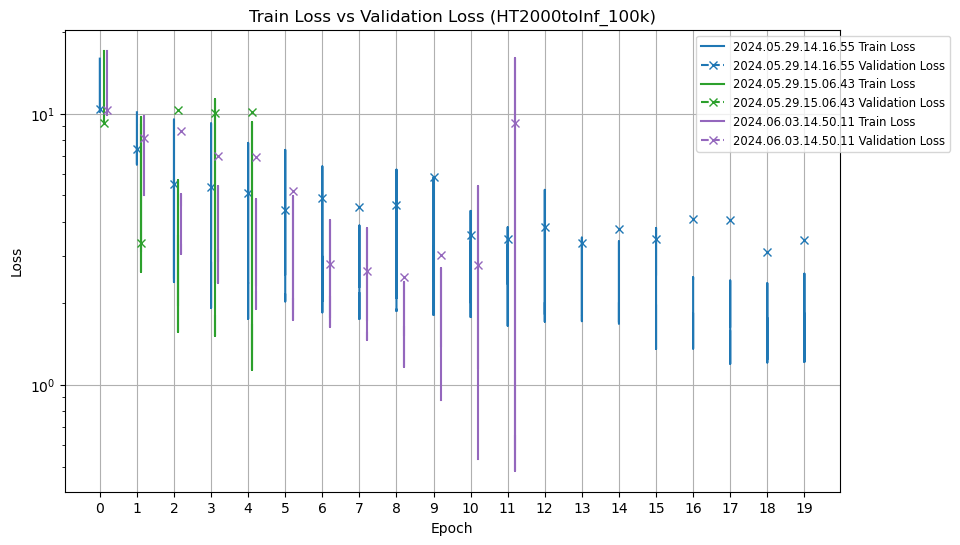

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics():
    folders = [folder for folder in os.listdir('.') if os.path.isdir(folder)]
    
    slice_data = {}

    for folder in folders:
        slice_name = '_'.join(folder.split('_')[5:7])
        
        csv_file_path = os.path.join(folder, 'lightning_logs', 'version_0', 'metrics.csv')

        if os.path.exists(csv_file_path):
            df = pd.read_csv(csv_file_path)
            
            if slice_name not in slice_data:
                slice_data[slice_name] = []
            
            slice_data[slice_name].append((folder, df))

    colors = plt.cm.tab10(np.linspace(0, 1, len(slice_data)))

    for slice_name, data in slice_data.items():
        plt.figure(figsize=(10, 6))

        offset = 0.1
        for i, (folder, df) in enumerate(data):
            label = folder.split('_')[1]
            
            color = colors[i % len(colors)]
            
            if 'epoch' in df.columns and 'train_loss' in df.columns:
                plt.plot(df['epoch'] + i * offset, df['train_loss'], label=f'{label} Train Loss', linestyle='-', linewidth=1.5, color=color)

            if 'epoch' in df.columns and 'val_loss/dataloader_idx_0' in df.columns:
                plt.plot(df['epoch'] + i * offset, df['val_loss/dataloader_idx_0'], label=f'{label} Validation Loss', linestyle='--', marker='x', linewidth=1.5, color=color)

        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Train Loss vs Validation Loss ({slice_name})')
        plt.yscale('log')
        plt.grid(True)


        all_epochs = np.concatenate([df['epoch'] for _, df in data])
        unique_epochs = np.unique(all_epochs)
        plt.xticks(unique_epochs)

        plt.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.15, 1))
        plt.show()

plot_metrics()
